In [48]:
import cmdstanpy as csp

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data_all = pd.read_csv("data_500.csv")

In [16]:
N = data_all.shape[0]

z_sigma = data_all["z_sigma"]
median_z = data_all["median_z"]

nu = 3
lambda_value = 1

In [17]:
data = {'N': N, 
        'z_sigma': z_sigma,
        'median_z': median_z,
        'nu': nu,
        'lambda': lambda_value,}

In [18]:
model = csp.CmdStanModel(stan_file = 'linear-regression.stan')
sample = model.sample(data = data, seed = 1, chains = 1,
                      iter_sampling = 1000, iter_warmup = 1000,
                      show_progress = False, show_console = False)

13:29:46 - cmdstanpy - INFO - compiling stan file C:\Users\mirar\Desktop\github-repos\stat-775-final\linear-regression-model\linear-regression.stan to exe file C:\Users\mirar\Desktop\github-repos\stat-775-final\linear-regression-model\linear-regression.exe
13:30:39 - cmdstanpy - INFO - compiled model executable: C:\Users\mirar\Desktop\github-repos\stat-775-final\linear-regression-model\linear-regression.exe
13:30:40 - cmdstanpy - INFO - CmdStan start processing
13:30:40 - cmdstanpy - INFO - Chain [1] start processing
13:30:40 - cmdstanpy - INFO - Chain [1] done processing
13:30:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear-regression.stan', line 19, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


In [21]:
alpha_list = sample.stan_variable("alpha")
beta_list = sample.stan_variable("beta")

Text(0, 0.5, 'z_sigma')

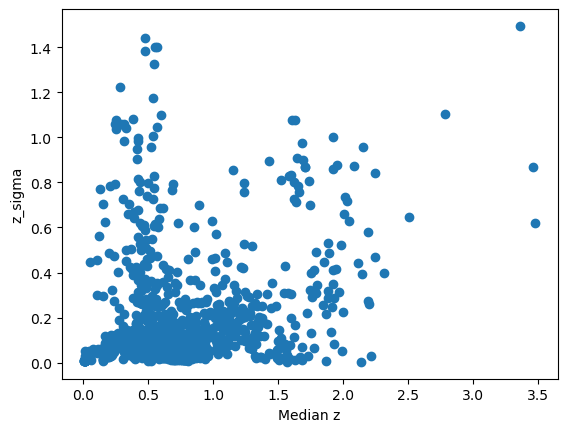

In [23]:
plt.scatter(median_z, z_sigma)
plt.xlabel("Median z")
plt.ylabel("z_sigma")

In [53]:
zs = np.arange(0, np.max(median_z), np.max(median_z)/1000)
segs = []
for i in range(len(alpha_list)):
    data = alpha_list[i] + beta_list[i]*zs
    segs.append(((zs[0], data[0]), (zs[-1], data[-1])))

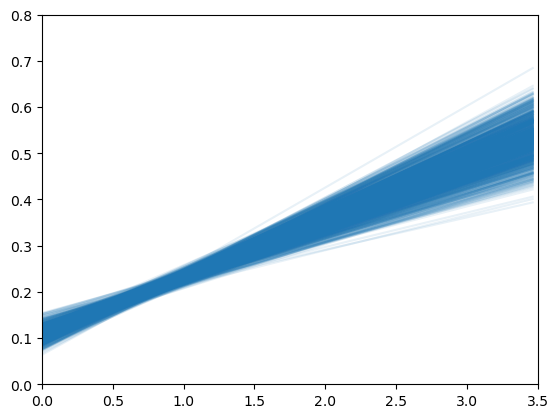

In [61]:
ln_coll = matplotlib.collections.LineCollection(segs, alpha=0.1)
ax = plt.gca()
ax.add_collection(ln_coll)
ax.set_xlim(0, 3.5)    
ax.set_ylim(0, 0.8)
plt.draw()